In [1]:
import os
import numpy as np
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt
import librosa
import pandas as pd
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv(r'C:\Users\heera\Desktop\Dissertation\Data Physionet\traindata\merged_featureextracted.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,0.1
0,-577.74457,116.68117,82.454210,40.931873,7.485605,-7.887007,-4.491601,10.008358,24.508472,30.438593,...,5.994569,5.839570,3.671601,0.848826,-1.004319,-1.004396,0.530715,2.398161,3.331668,1
1,-628.81630,136.51126,100.357864,56.209590,19.551243,0.428206,-0.259094,10.158183,21.104572,24.655876,...,3.507886,2.841200,1.227278,-0.146953,-0.405241,0.449801,1.629177,2.186590,1.692338,1
2,-601.18340,77.22223,61.623146,42.221630,25.632828,16.337782,15.002048,18.738730,23.003593,24.039800,...,2.748103,2.922751,2.290715,1.166961,0.225971,0.042497,0.699116,1.713670,2.332496,1
3,-562.58900,88.77356,71.557740,49.522438,29.541950,16.664858,12.350879,14.427670,18.631382,20.879950,...,0.984788,1.662023,2.113323,2.125078,1.752352,1.235468,0.835051,0.692907,0.788556,1
4,-489.47345,65.72582,57.030285,45.383488,33.820340,24.795256,19.436210,17.373821,17.174334,17.152473,...,2.122123,2.094586,2.164926,2.183312,2.057845,1.794090,1.474256,1.199110,1.032410,1


In [4]:
df = df.rename(columns={"0.1": "labels"})

In [5]:
df["labels"].value_counts()

0    2575
1     665
Name: labels, dtype: int64

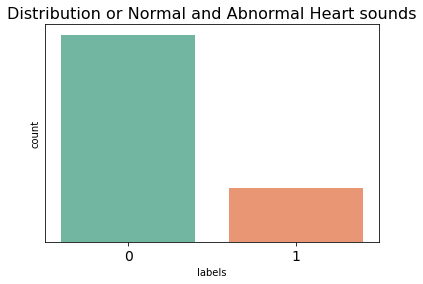

In [6]:
import seaborn as sns
plt.title("Distribution or Normal and Abnormal Heart sounds",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
plt.yticks([])
sns.countplot(x='labels',data=df,palette="Set2")
plt.show()
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
#             '{:.0f}'.format(height), 
#             horizontalalignment='center', 
#             verticalalignment='center')


# Split the Dataset and balance the y variable

In [7]:
### Split the dataset into independent and dependent dataset


In [8]:
X = df.iloc[:,0:40]
# y = df["class"]

In [9]:
X.shape

(3240, 40)

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-577.74457,116.68117,82.454210,40.931873,7.485605,-7.887007,-4.491601,10.008358,24.508472,30.438593,...,3.970105,5.994569,5.839570,3.671601,0.848826,-1.004319,-1.004396,0.530715,2.398161,3.331668
1,-628.81630,136.51126,100.357864,56.209590,19.551243,0.428206,-0.259094,10.158183,21.104572,24.655876,...,2.601242,3.507886,2.841200,1.227278,-0.146953,-0.405241,0.449801,1.629177,2.186590,1.692338
2,-601.18340,77.22223,61.623146,42.221630,25.632828,16.337782,15.002048,18.738730,23.003593,24.039800,...,2.034146,2.748103,2.922751,2.290715,1.166961,0.225971,0.042497,0.699116,1.713670,2.332496
3,-562.58900,88.77356,71.557740,49.522438,29.541950,16.664858,12.350879,14.427670,18.631382,20.879950,...,0.486486,0.984788,1.662023,2.113323,2.125078,1.752352,1.235468,0.835051,0.692907,0.788556
4,-489.47345,65.72582,57.030285,45.383488,33.820340,24.795256,19.436210,17.373821,17.174334,17.152473,...,2.368080,2.122123,2.094586,2.164926,2.183312,2.057845,1.794090,1.474256,1.199110,1.032410


In [11]:
y = df[["labels"]]

In [12]:
y.shape

(3240, 1)

In [13]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X_train.shape

(2592, 40)

In [15]:
X_test.shape

(648, 40)

In [16]:
y_train.shape 

(2592, 1)

In [17]:
y_test.shape

(648, 1)

In [18]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [20]:
### No of classes
num_labels=1

# ANN Architecture

In [21]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [23]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [24]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
65/81 [=======================>......] - ETA: 0s - loss: 10.4984 - accuracy: 0.6611
Epoch 00001: val_loss improved from inf to 0.47733, saving model to saved_models\audio_classification.hdf5
81/81 [==============================] - 1s 4ms/step - loss: 9.5254 - accuracy: 0.6640 - val_loss: 0.4773 - val_accuracy: 0.8117
Epoch 2/100
69/81 [========================>.....] - ETA: 0s - loss: 3.0865 - accuracy: 0.6685
Epoch 00002: val_loss did not improve from 0.47733
81/81 [==============================] - 0s 2ms/step - loss: 2.9716 - accuracy: 0.6620 - val_loss: 0.5037 - val_accuracy: 0.8117
Epoch 3/100
71/81 [=========================>....] - ETA: 0s - loss: 1.5189 - accuracy: 0.6703
Epoch 00003: val_loss did not improve from 0.47733
81/81 [==============================] - 0s 2ms/step - loss: 1.4687 - accuracy: 0.6721 - val_loss: 0.5859 - val_accuracy: 0.8117
Epoch 4/100
69/81 [========================>.....] - ETA: 0s - loss: 0.9042 - accuracy: 0.7133
Epoch 00004: val_loss d

Epoch 29/100
71/81 [=========================>....] - ETA: 0s - loss: 0.3955 - accuracy: 0.7870
Epoch 00029: val_loss improved from 0.36433 to 0.33847, saving model to saved_models\audio_classification.hdf5
81/81 [==============================] - 0s 2ms/step - loss: 0.3911 - accuracy: 0.7940 - val_loss: 0.3385 - val_accuracy: 0.8117
Epoch 30/100
66/81 [=======================>......] - ETA: 0s - loss: 0.3868 - accuracy: 0.8007
Epoch 00030: val_loss did not improve from 0.33847
81/81 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8005 - val_loss: 0.3467 - val_accuracy: 0.8117
Epoch 31/100
73/81 [==========================>...] - ETA: 0s - loss: 0.4017 - accuracy: 0.7864
Epoch 00031: val_loss improved from 0.33847 to 0.33081, saving model to saved_models\audio_classification.hdf5
81/81 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.7951 - val_loss: 0.3308 - val_accuracy: 0.8117
Epoch 32/100
72/81 [=========================>....] 

Epoch 56/100
70/81 [========================>.....] - ETA: 0s - loss: 0.3187 - accuracy: 0.8464
Epoch 00056: val_loss improved from 0.26814 to 0.26441, saving model to saved_models\audio_classification.hdf5
81/81 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.8492 - val_loss: 0.2644 - val_accuracy: 0.8873
Epoch 57/100
67/81 [=======================>......] - ETA: 0s - loss: 0.2917 - accuracy: 0.8638
Epoch 00057: val_loss did not improve from 0.26441
81/81 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8615 - val_loss: 0.2691 - val_accuracy: 0.8920
Epoch 58/100
74/81 [==========================>...] - ETA: 0s - loss: 0.3049 - accuracy: 0.8488
Epoch 00058: val_loss did not improve from 0.26441
81/81 [==============================] - 0s 2ms/step - loss: 0.3025 - accuracy: 0.8503 - val_loss: 0.2657 - val_accuracy: 0.8935
Epoch 59/100
69/81 [========================>.....] - ETA: 0s - loss: 0.3088 - accuracy: 0.8610
Epoch 00059: val

Epoch 85/100
76/81 [===========================>..] - ETA: 0s - loss: 0.2973 - accuracy: 0.8651
Epoch 00085: val_loss did not improve from 0.24411
81/81 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8657 - val_loss: 0.2592 - val_accuracy: 0.8935
Epoch 86/100
71/81 [=========================>....] - ETA: 0s - loss: 0.2811 - accuracy: 0.8763
Epoch 00086: val_loss did not improve from 0.24411
81/81 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.8769 - val_loss: 0.2502 - val_accuracy: 0.8935
Epoch 87/100
76/81 [===========================>..] - ETA: 0s - loss: 0.2709 - accuracy: 0.8746
Epoch 00087: val_loss did not improve from 0.24411
81/81 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.8750 - val_loss: 0.2580 - val_accuracy: 0.8904
Epoch 88/100
41/81 [==============>...............] - ETA: 0s - loss: 0.2858 - accuracy: 0.8605
Epoch 00088: val_loss did not improve from 0.24411
81/81 [==================

# Test Accuracy

In [25]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])


0.8904321193695068


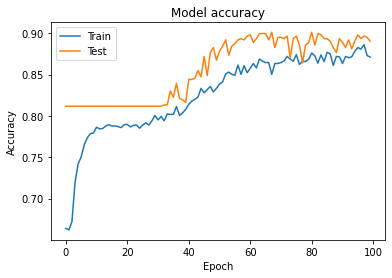

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

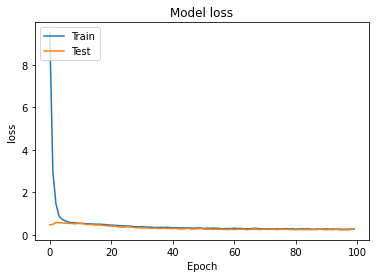

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()